  #            Car Price Prediction: Multiple Linear Regression

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Data Loading

In [87]:
car_df = pd.read_csv('F:\Class Material\Semester 2\MAL\C1\CarPrice.csv')
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [88]:
car_df.shape

(205, 26)

In [89]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [90]:
car_df.isnull().values.any()

False

In [91]:
car_df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Statistical Summary

In [92]:
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [93]:
car_df.duplicated().sum()

0

In [94]:
#dropping unnecessary columns
car_df=car_df.drop(['car_ID','CarName'],axis=1)

In [95]:
#changing variabl type
car_df['symboling']=car_df['symboling'].astype('str')


In [96]:
categorical_cols=car_df.select_dtypes(include=['object']).columns

In [97]:
car_df[categorical_cols].head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [98]:
numerical_cols=car_df.select_dtypes(exclude=['object']).columns

In [99]:
car_df[numerical_cols].head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [100]:
car_df.skew()

symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

In [101]:
car_df.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


## Exploratory Data Analysis

In [102]:
car_df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

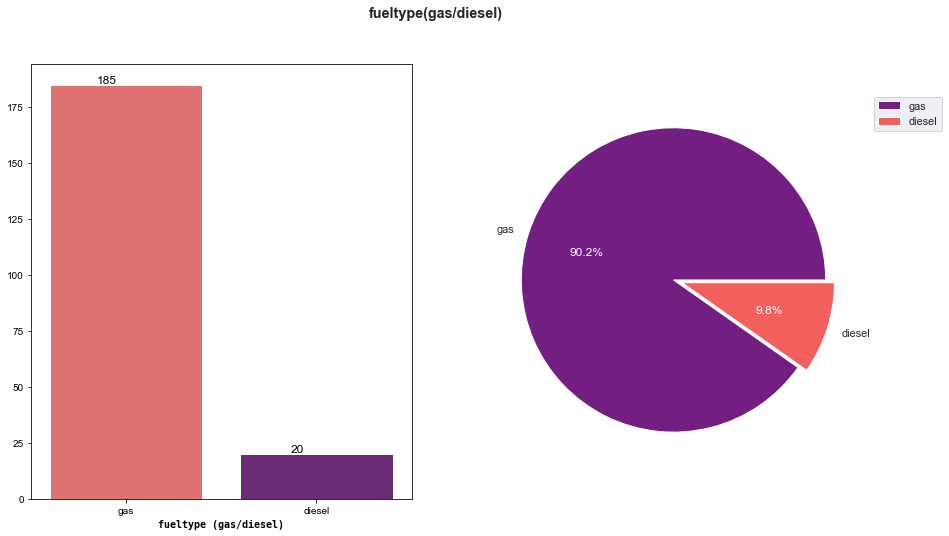

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=car_df['fueltype'].value_counts().index
y=car_df['fueltype'].value_counts().values.tolist()
data = car_df.groupby("fueltype").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('fueltype (gas/diesel)', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in car_df['fueltype'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('fueltype(gas/diesel)',weight = 'bold')
plt.show()

In [104]:
car_df['symboling'].value_counts()

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

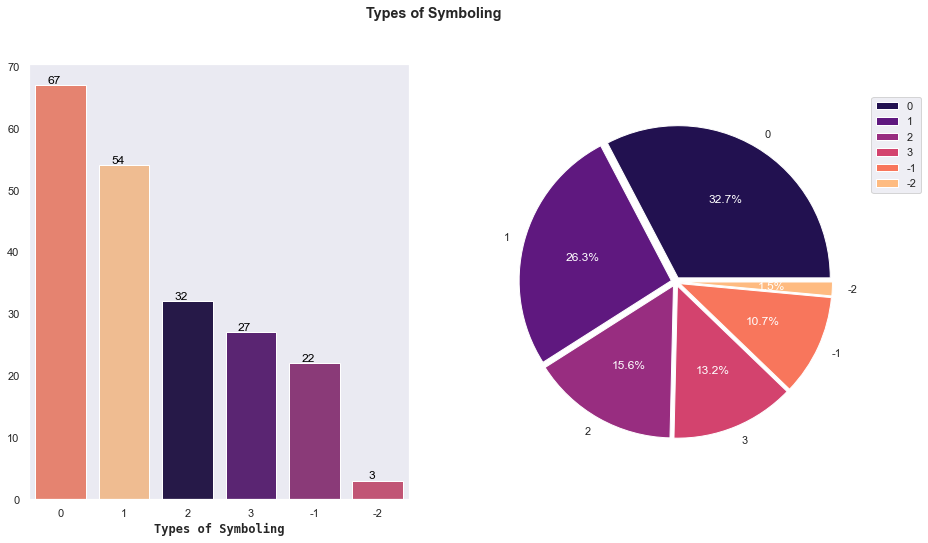

In [105]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=car_df['symboling'].value_counts().index
y=car_df['symboling'].value_counts().values.tolist()
data = car_df.groupby("symboling").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of Symboling', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in car_df['symboling'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of Symboling',weight = 'bold')
plt.show()


In [106]:
car_df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

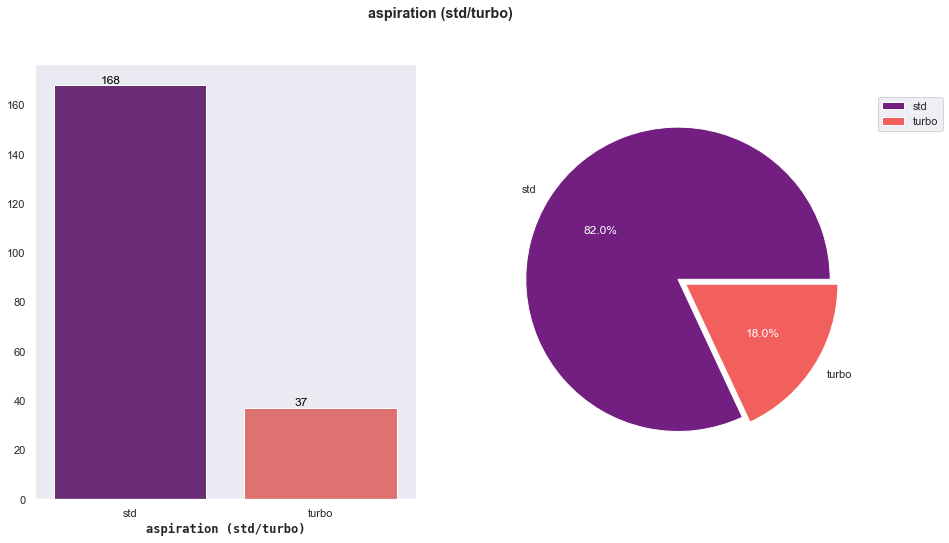

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=car_df['aspiration'].value_counts().index
y=car_df['aspiration'].value_counts().values.tolist()
data = car_df.groupby("aspiration").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('aspiration (std/turbo)', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in car_df['aspiration'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('aspiration (std/turbo)',weight = 'bold')
plt.show()


In [108]:
car_df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

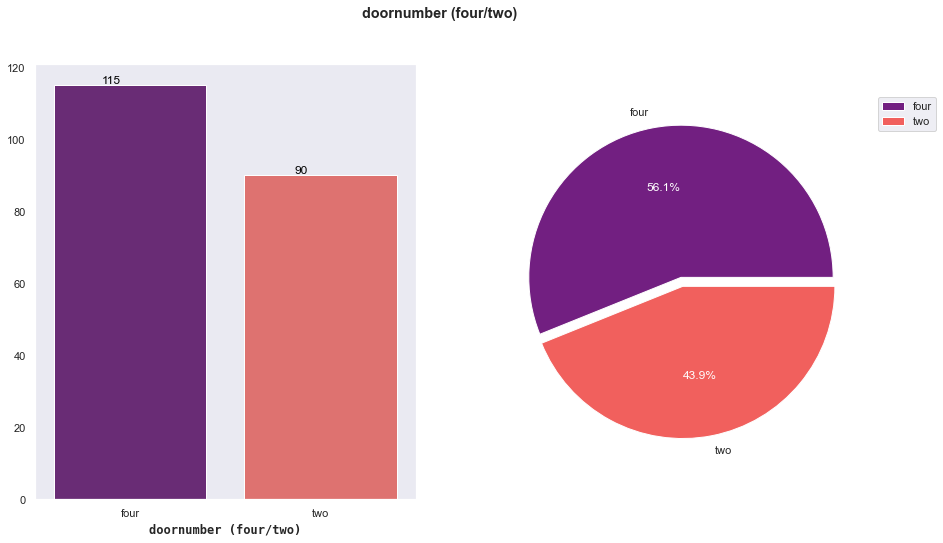

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=car_df['doornumber'].value_counts().index
y=car_df['doornumber'].value_counts().values.tolist()
data = car_df.groupby("doornumber").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('doornumber (four/two)', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in car_df['doornumber'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('doornumber (four/two)',weight = 'bold')
plt.show()


In [110]:
car_df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

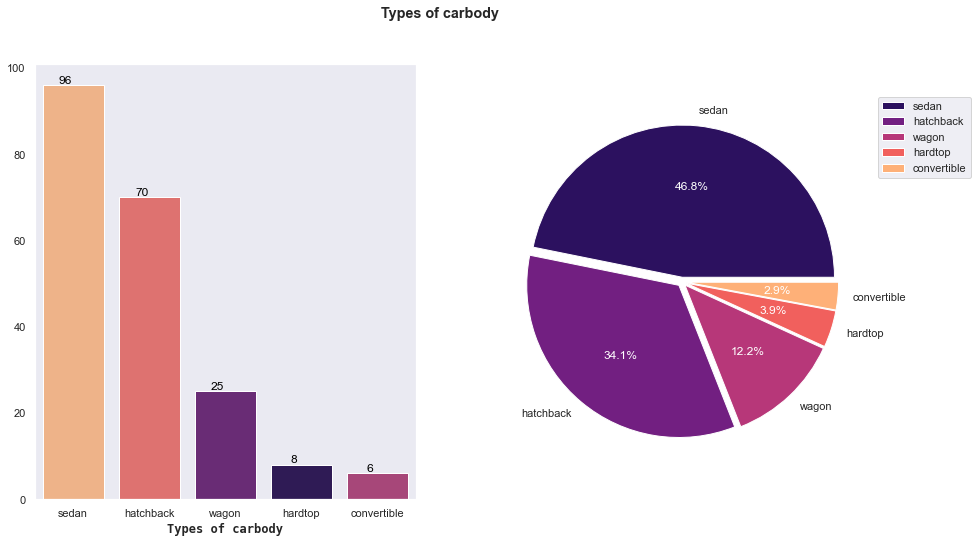

In [111]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=car_df['carbody'].value_counts().index
y=car_df['carbody'].value_counts().values.tolist()
data = car_df.groupby("carbody").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of carbody', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in car_df['carbody'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of carbody',weight = 'bold')
plt.show()

In [112]:
car_df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

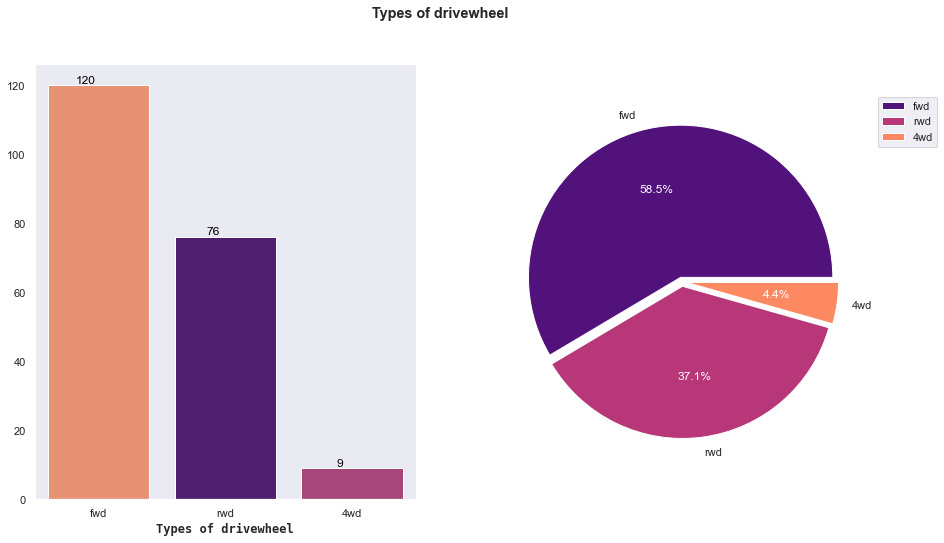

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=car_df['drivewheel'].value_counts().index
y=car_df['drivewheel'].value_counts().values.tolist()
data = car_df.groupby("drivewheel").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of drivewheel', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in car_df['drivewheel'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of drivewheel',weight = 'bold')
plt.show()

In [114]:
car_df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

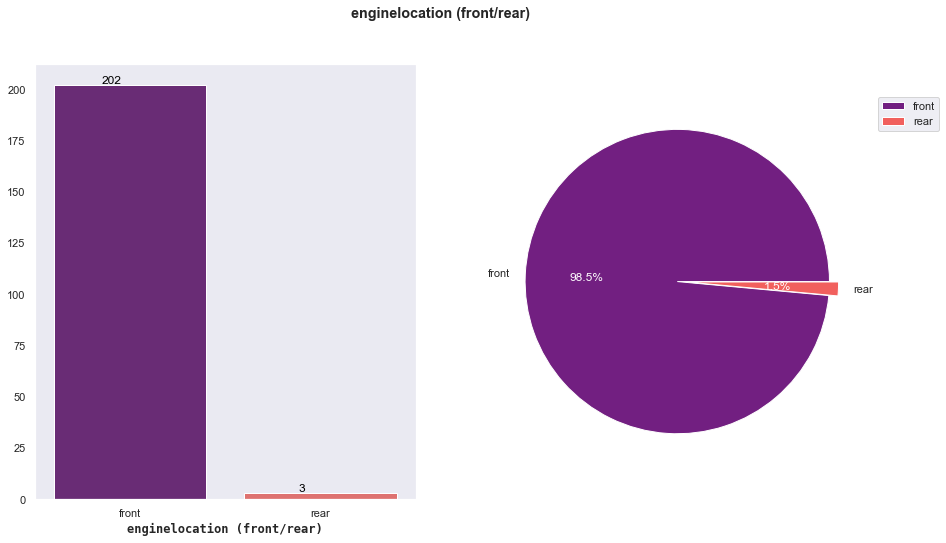

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=car_df['enginelocation'].value_counts().index
y=car_df['enginelocation'].value_counts().values.tolist()
data = car_df.groupby("enginelocation").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('enginelocation (front/rear)', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in car_df['enginelocation'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('enginelocation (front/rear)',weight = 'bold')
plt.show()

In [116]:
car_df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

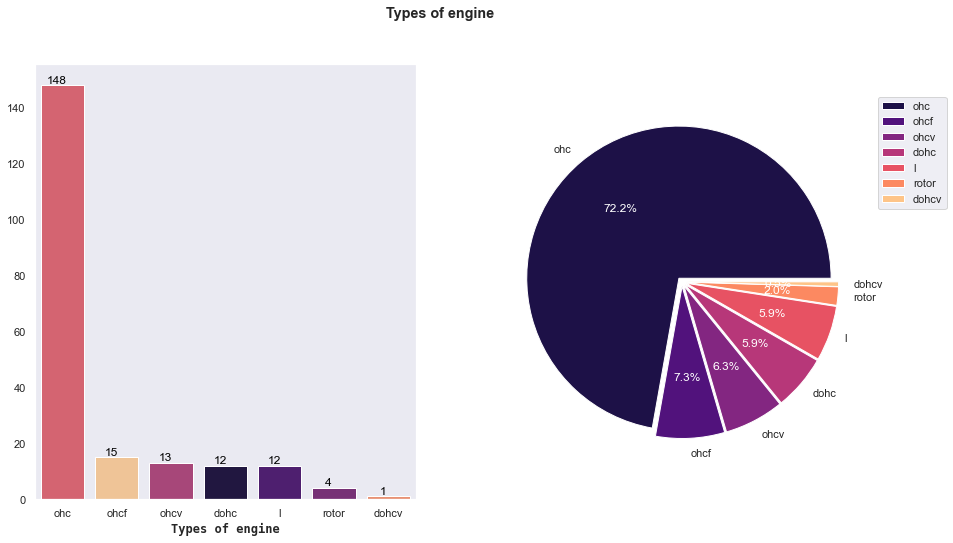

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=car_df['enginetype'].value_counts().index
y=car_df['enginetype'].value_counts().values.tolist()
data = car_df.groupby("enginetype").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of engine', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in car_df['enginetype'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of engine',weight = 'bold')
plt.show()

In [118]:
car_df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

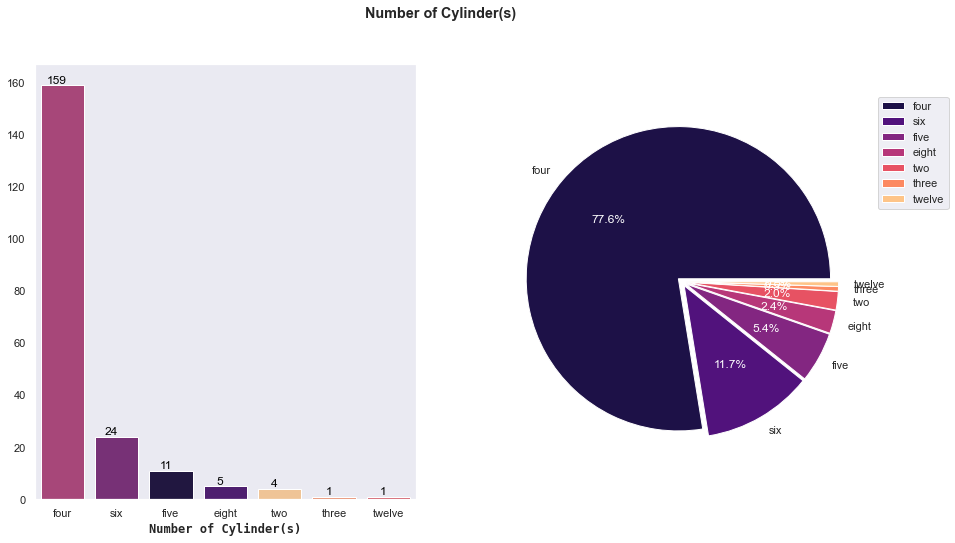

In [119]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=car_df['cylindernumber'].value_counts().index
y=car_df['cylindernumber'].value_counts().values.tolist()
data = car_df.groupby("cylindernumber").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Number of Cylinder(s)', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in car_df['cylindernumber'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Number of Cylinder(s)',weight = 'bold')
plt.show()

In [120]:
car_df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

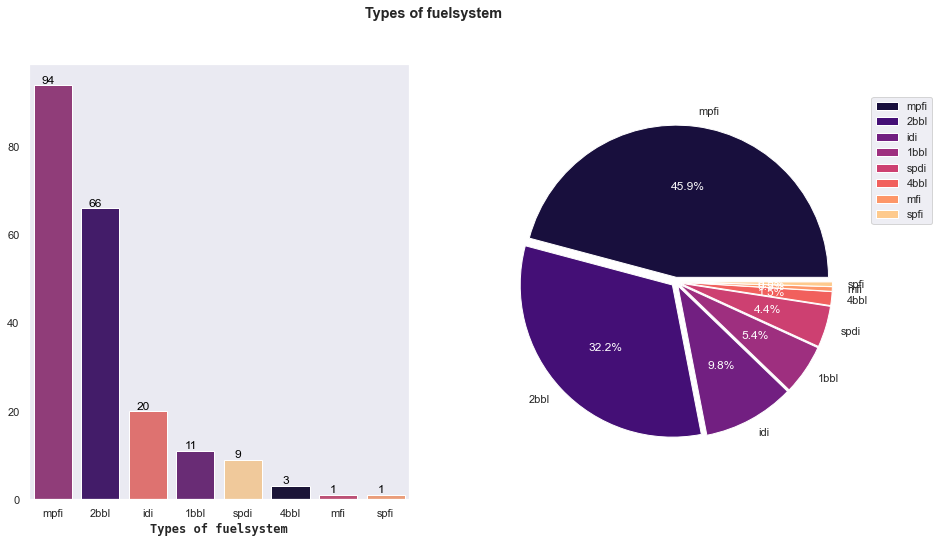

In [121]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=car_df['fuelsystem'].value_counts().index
y=car_df['fuelsystem'].value_counts().values.tolist()
data = car_df.groupby("fuelsystem").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of fuelsystem', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in car_df['fuelsystem'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of fuelsystem',weight = 'bold')
plt.show()

<AxesSubplot:xlabel='wheelbase', ylabel='price'>

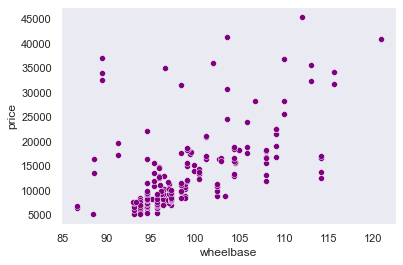

In [122]:
sns.scatterplot(x="wheelbase", y="price", data=car_df,color='purple')

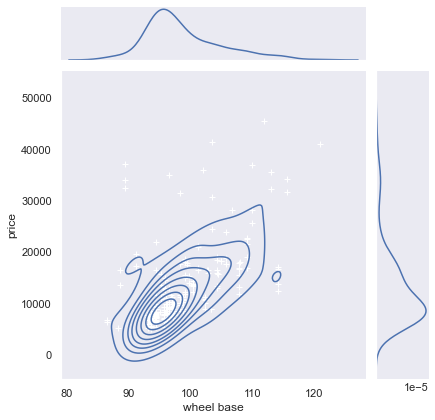

In [123]:
g = sns.jointplot(x="wheelbase", y="price", data=car_df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("wheel base", "price");

<AxesSubplot:xlabel='carlength', ylabel='price'>

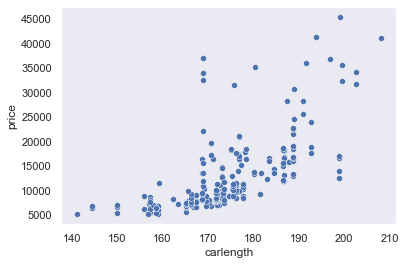

In [124]:
sns.scatterplot(x="carlength", y="price", data=car_df,color='b')

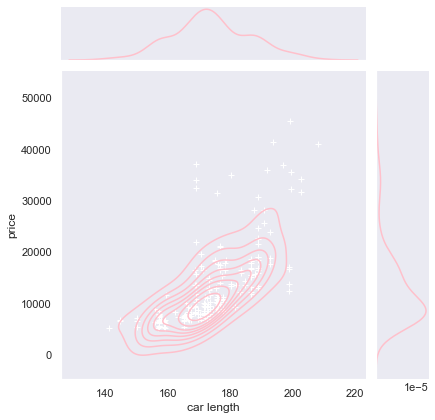

In [125]:
g = sns.jointplot(x="carlength", y="price", data=car_df, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car length", "price");

<AxesSubplot:xlabel='carwidth', ylabel='price'>

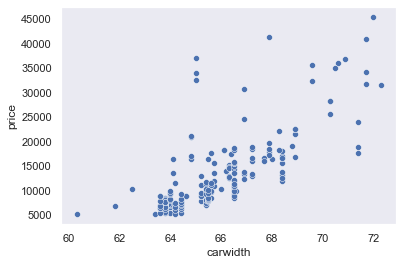

In [126]:
sns.scatterplot(x="carwidth", y="price", data=car_df,color='b')

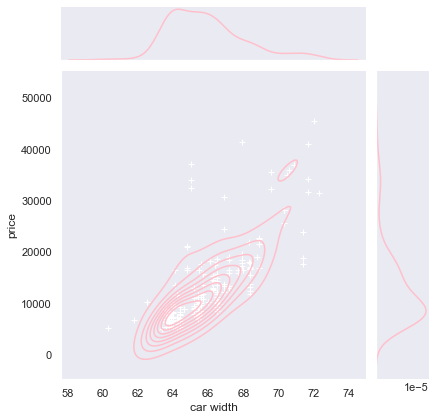

In [127]:
g = sns.jointplot(x="carwidth", y="price", data=car_df, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "price");

<AxesSubplot:xlabel='carlength', ylabel='carwidth'>

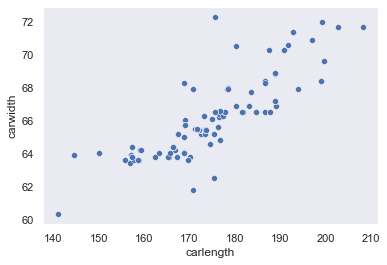

In [128]:
sns.scatterplot(x="carlength", y="carwidth", data=car_df,color='b')

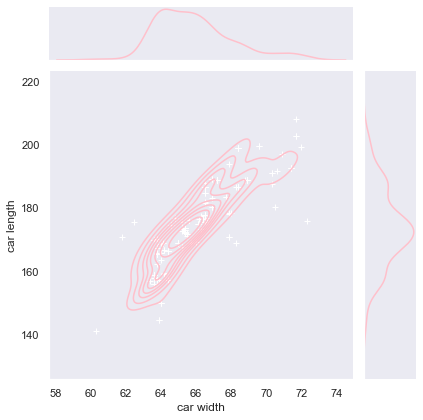

In [129]:
g = sns.jointplot(x="carwidth", y="carlength", data=car_df, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "car length");

<AxesSubplot:xlabel='curbweight', ylabel='price'>

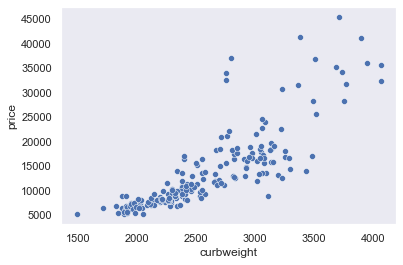

In [130]:
sns.scatterplot(x="curbweight", y="price", data=car_df,color='b')

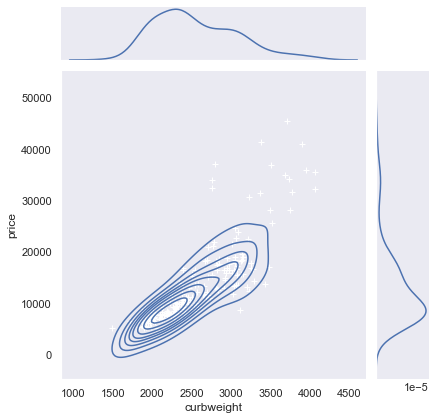

In [131]:
g = sns.jointplot(x="curbweight", y="price", data=car_df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("curbweight", "price");


<AxesSubplot:xlabel='enginesize', ylabel='price'>

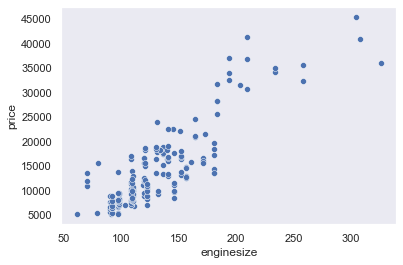

In [132]:
sns.scatterplot(x="enginesize", y="price", data=car_df,color='b')

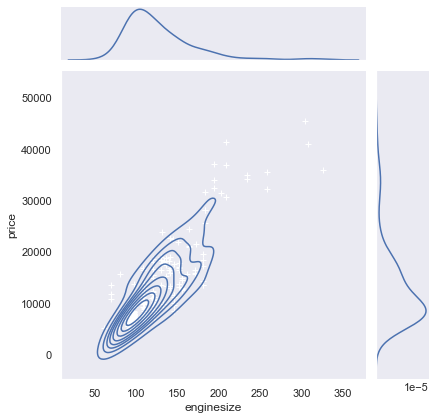

In [133]:
g = sns.jointplot(x="enginesize", y="price", data=car_df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("enginesize", "price");

<AxesSubplot:xlabel='boreratio', ylabel='price'>

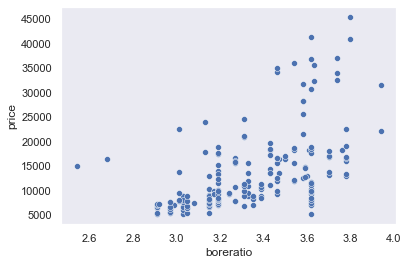

In [134]:
sns.scatterplot(x="boreratio", y="price", data=car_df,color='b')

<AxesSubplot:xlabel='stroke', ylabel='price'>

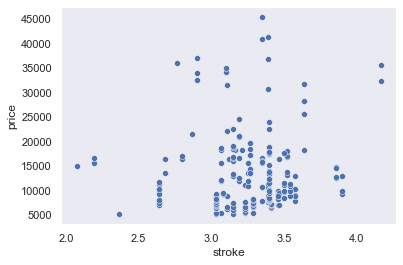

In [135]:
sns.scatterplot(x="stroke", y="price", data=car_df,color='b')

<AxesSubplot:xlabel='compressionratio', ylabel='price'>

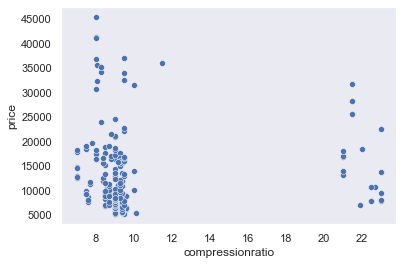

In [136]:
sns.scatterplot(x="compressionratio", y="price", data=car_df,color='b')

<AxesSubplot:xlabel='horsepower', ylabel='price'>

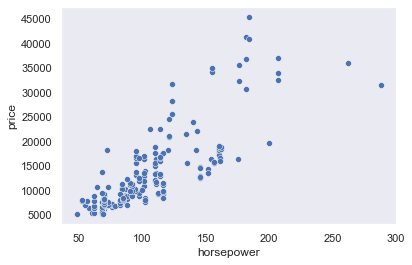

In [137]:
sns.scatterplot(x="horsepower", y="price", data=car_df,color='b')

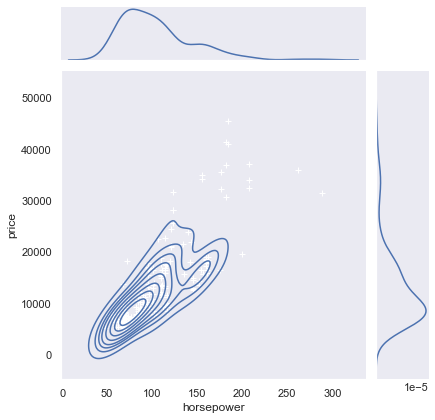

In [138]:
g = sns.jointplot(x="horsepower", y="price", data=car_df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("horsepower", "price");

<AxesSubplot:xlabel='peakrpm', ylabel='price'>

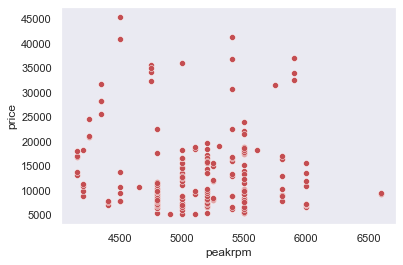

In [139]:
sns.scatterplot(x="peakrpm", y="price", data=car_df,color='r')

<AxesSubplot:xlabel='citympg', ylabel='price'>

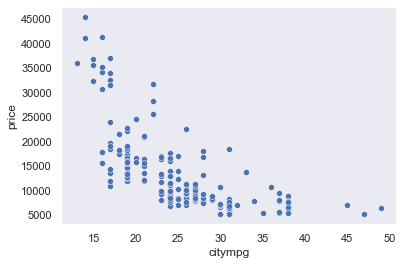

In [140]:
sns.scatterplot(x="citympg", y="price", data=car_df,color='b')

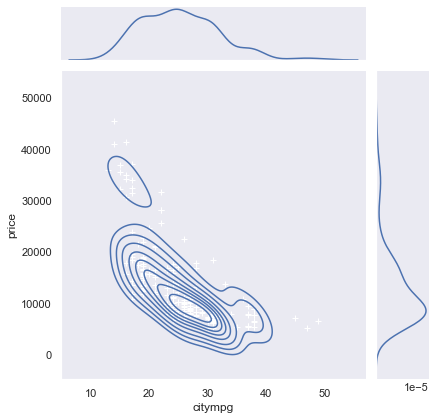

In [141]:
g = sns.jointplot(x="citympg", y="price", data=car_df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("citympg", "price");

<AxesSubplot:xlabel='highwaympg', ylabel='price'>

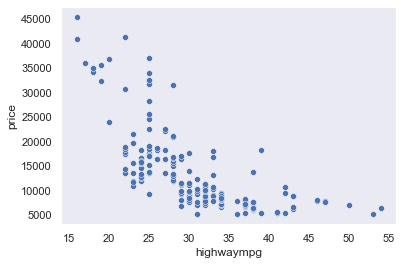

In [142]:
sns.scatterplot(x="highwaympg", y="price", data=car_df,color='b')

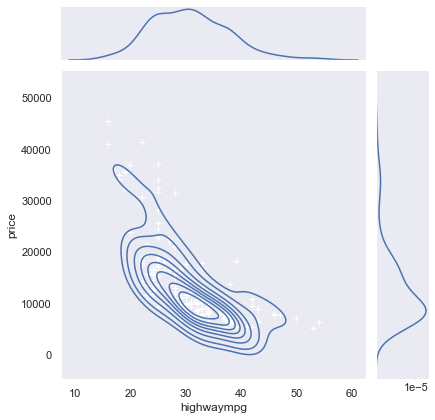

In [143]:
g = sns.jointplot(x="highwaympg", y="price", data=car_df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("highwaympg", "price");

In [144]:
#correlation of numerical data
car_df[numerical_cols].corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


<AxesSubplot:>

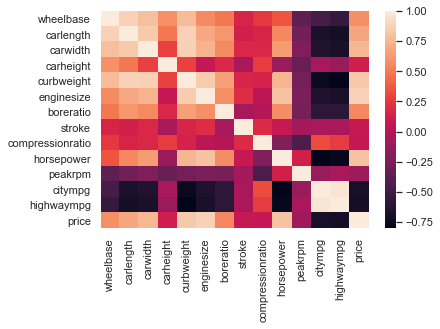

In [145]:
sns.heatmap(car_df[numerical_cols].corr())

## Preprocessing the data

In [146]:
def LABEL_ENCODING(l1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    car_df[l1]= label_encoder.fit_transform(car_df[l1])
    car_df[l1].unique()

### Converting Categorical to Numerical

In [147]:
LABEL_ENCODING("fueltype")
LABEL_ENCODING("aspiration")
LABEL_ENCODING("doornumber")
LABEL_ENCODING("carbody")
LABEL_ENCODING("drivewheel")
LABEL_ENCODING("enginelocation")
LABEL_ENCODING("enginetype")
LABEL_ENCODING("cylindernumber")
LABEL_ENCODING("fuelsystem")
car_df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


### Scaling the dataset

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(car_df.drop(['price'],axis = 1))
scaled_features = scaler.transform(car_df.drop('price',axis = 1))

In [149]:
X = scaled_features
Y = car_df['price']
X= pd.DataFrame(data=X,columns = car_df.drop(columns=['price']).columns)

### Correlation 

In [150]:
X.corr()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
symboling,1.000000,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,-0.232919,...,0.197762,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606
fueltype,0.194311,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,-0.233880,...,0.110617,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392
aspiration,-0.059866,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,0.300567,...,-0.133119,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416
doornumber,0.664073,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,-0.207168,...,0.154322,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330
carbody,-0.596135,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,0.131710,...,-0.048408,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170
drivewheel,-0.041671,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,0.470751,...,0.223238,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220
enginelocation,0.212471,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,-0.051698,...,0.135541,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026
wheelbase,-0.531954,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,0.795144,...,-0.184596,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082
carlength,-0.357612,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,0.841118,...,-0.109585,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662
carwidth,-0.232919,-0.233880,0.300567,-0.207168,0.131710,0.470751,-0.051698,0.795144,0.841118,1.000000,...,-0.194074,0.735433,0.521434,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218


In [151]:
k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if(k.loc[i,j]>abs(0.5))&(i!=j)]
z,len(z)

([['symboling', 'doornumber'],
  ['doornumber', 'symboling'],
  ['carbody', 'carheight'],
  ['drivewheel', 'curbweight'],
  ['drivewheel', 'enginesize'],
  ['drivewheel', 'horsepower'],
  ['wheelbase', 'carlength'],
  ['wheelbase', 'carwidth'],
  ['wheelbase', 'carheight'],
  ['wheelbase', 'curbweight'],
  ['wheelbase', 'enginesize'],
  ['carlength', 'wheelbase'],
  ['carlength', 'carwidth'],
  ['carlength', 'curbweight'],
  ['carlength', 'enginesize'],
  ['carlength', 'fuelsystem'],
  ['carlength', 'boreratio'],
  ['carlength', 'horsepower'],
  ['carwidth', 'wheelbase'],
  ['carwidth', 'carlength'],
  ['carwidth', 'curbweight'],
  ['carwidth', 'enginesize'],
  ['carwidth', 'fuelsystem'],
  ['carwidth', 'boreratio'],
  ['carwidth', 'horsepower'],
  ['carheight', 'carbody'],
  ['carheight', 'wheelbase'],
  ['curbweight', 'drivewheel'],
  ['curbweight', 'wheelbase'],
  ['curbweight', 'carlength'],
  ['curbweight', 'carwidth'],
  ['curbweight', 'enginesize'],
  ['curbweight', 'fuelsystem'

## Variance Inflation Factor

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=X

VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

symboling            2.818795
fueltype            96.896321
aspiration           3.301326
doornumber           2.838657
carbody              2.786743
drivewheel           2.558937
enginelocation       1.743238
wheelbase           10.888297
carlength           11.798256
carwidth             8.935914
carheight            3.063991
curbweight          19.074105
enginetype           1.612369
cylindernumber       2.251293
enginesize          13.729257
fuelsystem           2.413984
boreratio            2.296375
stroke               1.584189
compressionratio    88.926493
horsepower          15.365644
peakrpm              2.675025
citympg             32.812012
highwaympg          28.305212
dtype: float64

## Removing Multicollinearity

In [153]:
def MC_remover(car_df):
    vif=pd.Series([variance_inflation_factor(car_df.values,i)for i in range(car_df.shape[1])],index=car_df.columns)
    if vif.max()>5:
        print(vif[vif == vif.max()].index[0],'has been removed')
        car_df = car_df.drop(columns=[vif[vif==vif.max()].index[0]])
        return car_df
    else:
        print("No multicollinearity present anymore")
        return car_df

In [154]:
for i in range(10):
    vif_data=MC_remover(vif_data)
vif_data.head()

fueltype has been removed
citympg has been removed
curbweight has been removed
horsepower has been removed
carlength has been removed
wheelbase has been removed
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore


,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,highwaympg
0,1.743470,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-0.844782,-2.020417,-2.865105,-0.147475,0.074449,0.869568,0.519071,-1.839377,-0.288349,-0.262960,-0.546059
1,1.743470,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-0.844782,-2.020417,-2.865105,-0.147475,0.074449,0.869568,0.519071,-1.839377,-0.288349,-0.262960,-0.546059
2,0.133509,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.190566,-0.543527,1.886890,1.112210,0.604046,0.869568,-2.404880,0.685946,-0.288349,-0.262960,-0.691627
3,0.938490,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.136542,0.235942,-0.013908,-0.147475,-0.431076,0.869568,-0.517266,0.462183,-0.035973,0.787855,-0.109354
4,0.938490,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.230001,0.235942,-0.013908,-1.407161,0.218885,0.869568,-0.517266,0.462183,-0.540725,0.787855,-1.273900


In [155]:
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(vif_data.columns)

(symboling           2.349239
 aspiration          1.659280
 doornumber          2.611613
 carbody             2.622162
 drivewheel          2.185071
 enginelocation      1.566749
 carwidth            4.207147
 carheight           2.237317
 enginetype          1.266421
 cylindernumber      1.670674
 enginesize          4.267818
 fuelsystem          2.034207
 boreratio           2.178579
 stroke              1.276295
 compressionratio    2.243753
 peakrpm             1.958028
 highwaympg          4.775559
 dtype: float64,
 17)

In [156]:
from sklearn.model_selection import train_test_split
X = vif_data
Y = car_df['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

In [157]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(normalize =True)
reg.fit(X_train,Y_train)

LinearRegression(normalize=True)

## Regression Coefficients 

In [158]:
reg.coef_

array([ 527.20758933, 1040.57979525, -489.54956218, -483.67472919,
       1317.13029568, 1240.34871277, 1113.22444377, 1044.18219213,
        444.43314784, -132.86057778, 5173.40020184, -353.64680427,
       -807.1491029 , -858.0199379 ,  636.7709272 ,  816.77944608,
       -924.0168884 ])

## Predicted Target Values

In [159]:
pred = reg.predict(X_test)
pred

array([24511.59649828,  7744.69188939,  8697.91093722, 11456.55125804,
        9020.27677   , 18008.12313943,  7754.97809251, 11159.0637268 ,
       10266.762453  ,  9930.95310674, 15112.97675814,  6713.91440291,
       12254.29590838, 21409.97020648, 13799.32725334,  8553.07092156,
        9015.57645675, 11138.64637431, 10831.46936542, 27392.3745555 ,
        8701.66828094, 34495.80380255,  8602.02727582, 17436.42292627,
       15831.80820236,  5727.83399452, 16980.06609146, 11602.48118403,
       11700.09089406, 21409.97020648,  8844.18304833,  6862.45128424,
        9805.75956818, 17879.33139342, 20357.07517116, 40695.8631123 ,
       14715.01661705, 17223.9126049 ,  5450.46415484, 12414.80820263,
        6839.57734626, 27392.3745555 , 23381.1667765 ,  6990.54360672,
        5599.50221738,  8165.98364422,  9521.17947923, 20212.9948417 ,
        8958.64078994,  9521.17947923,  7180.29949449, 18391.70760172,
        5037.43217815, 27867.20817508, 20041.55629587, 26877.40264257,
      

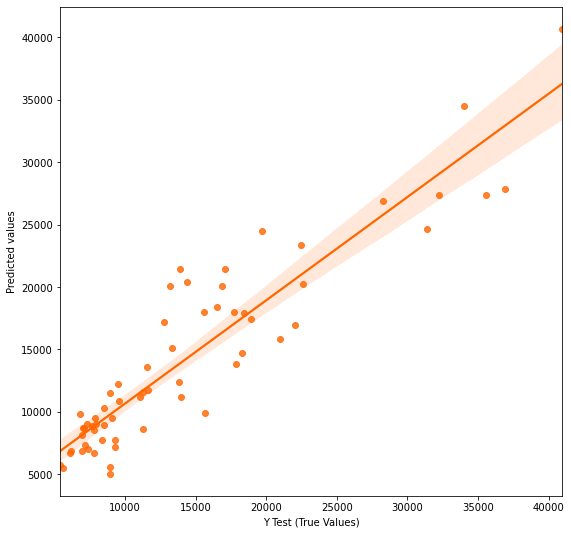

In [160]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(9,9))
sns.regplot(x = Y_test,y = pred, color='#FF6600')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

## R-Squared Score

In [161]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score",r2_score(Y_test,pred))
print("RMSE",np.sqrt(mean_squared_error(Y_test,pred)))

R2 score 0.8526975573699156
RMSE 3276.203022438966


## Price Distribution Graph

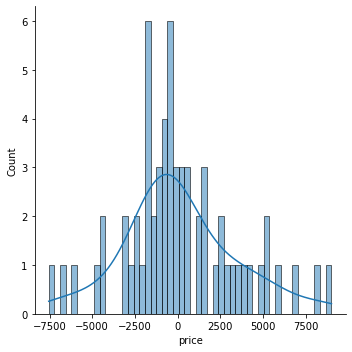

In [162]:
sns.displot(Y_test-pred,bins = 50,kde = True)
plt.show()

In [163]:
cdf = pd.DataFrame(reg.coef_,X.columns,columns = ['coef'])
cdf

,coef
symboling,527.207589
aspiration,1040.579795
doornumber,-489.549562
carbody,-483.674729
drivewheel,1317.130296
enginelocation,1240.348713
carwidth,1113.224444
carheight,1044.182192
enginetype,444.433148
cylindernumber,-132.860578


In [164]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators =100, random_state = 42,criterion="entropy")
forest.fit(X_train,Y_train)
y_pred1=forest.predict(X_test)

In [165]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score",r2_score(Y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(Y_test,y_pred1)))

R2 score 0.7807826787773073
RMSE 3996.715783663545
